# Project in Social Data Analysis

Data links:
- https://www.opendata.dk/city-of-copenhagen/trae_basis 
- https://www.opendata.dk/city-of-copenhagen/gadetraeer

Inspiration til vores illustration:
https://www.cloudred.com/labprojects/nyctrees/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [65]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [111]:
df1 = pd.read_csv("gadetraer.csv")
df1.head()

FID     id              traeart     slaegt       dansk_navn  \
0  gadetraer.1  18611  Tilia platyphyllos   Tilia sp.  Storbladet lind   
1  gadetraer.2  21291  Tilia platyphyllos   Tilia sp.  Storbladet lind   
2  gadetraer.3  21292  Tilia platyphyllos   Tilia sp.  Storbladet lind   
3  gadetraer.4  21293  Tilia platyphyllos   Tilia sp.  Storbladet lind   
4  gadetraer.5  21294  Tilia platyphyllos   Tilia sp.  Storbladet lind   

  slaegtsnavn  planteaar   plantet_halvaar garantiperioden_udloeber  \
0        Lind     1953.0  Ikke registreret         Ikke registreret   
1        Lind     1953.0  Ikke registreret         Ikke registreret   
2        Lind     1953.0  Ikke registreret         Ikke registreret   
3        Lind     1953.0  Ikke registreret         Ikke registreret   
4        Lind     1953.0  Ikke registreret         Ikke registreret   

  plantemetode ejer driftsorganisation                  driftsplan_navn  \
0         Muld  TMF    TMF-Byens Drift  Gadetræer Vesterbro-Kgs Enghave   
1         Muld  TMF    TMF-Byens Drift  Gadetræer Vesterbro-Kgs Enghave   
2         Muld  TMF    TMF-Byens Drift  Gadetræer Vesterbro-Kgs Enghave   
3         Muld  TMF    TMF-Byens Drift  Gadetræer Vesterbro-Kgs Enghave   
4         Muld  TMF    TMF-Byens Drift  Gadetræer Vesterbro-Kgs Enghave   

  driftsaftale_edoc_nr bemaerkning andre_vaekstforhold fredet_beskyttet_trae  \
0                  NaN         NaN                 NaN      Ikke registreret   
1                  NaN         NaN                 NaN      Ikke registreret   
2                  NaN         NaN                 NaN      Ikke registreret   
3                  NaN         NaN                 NaN      Ikke registreret   
4                  NaN         NaN                 NaN      Ikke registreret   

  fredning_edoc_nr     trae_historie botanisk_interesse donor anledning  \
0              NaN  Ikke registreret   Ikke registreret   NaN       NaN   
1              NaN  Ikke registreret   Ikke registreret   NaN       NaN   
2              NaN  Ikke registreret   Ikke registreret   NaN       NaN   
3              NaN  Ikke registreret   Ikke registreret   NaN       NaN   
4              NaN  Ikke registreret   Ikke registreret   NaN       NaN   

  saerligt_trae saerlig_trae_bem                 bydelsnavn fredet_trae_foto  \
0           nej              NaN  Vesterbro-Kongens Enghave              NaN   
1           nej              NaN  Vesterbro-Kongens Enghave              NaN   
2           nej              NaN  Vesterbro-Kongens Enghave              NaN   
3           nej              NaN  Vesterbro-Kongens Enghave              NaN   
4           nej              NaN  Vesterbro-Kongens Enghave              NaN   

   vejstatus                                   wkb_geometry  
0        2.0      POINT (12.5370471883976 55.6486340745573)  
1        2.0   POINT (12.536925020477707 55.64867988581558)  
2        2.0   POINT (12.537000905330974 55.64876361021244)  
3        2.0   POINT (12.537133269649273 55.64872321507861)  
4        2.0  POINT (12.537399549194998 55.648992732825036)

In [112]:
df1.shape

(19956, 28)

# Analyse af df1, *gadetraer.csv*

In [113]:
traer = df1.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)

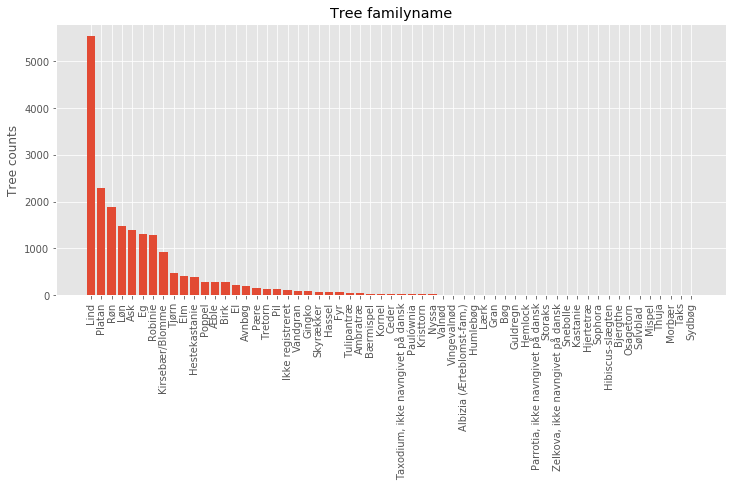

In [114]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()

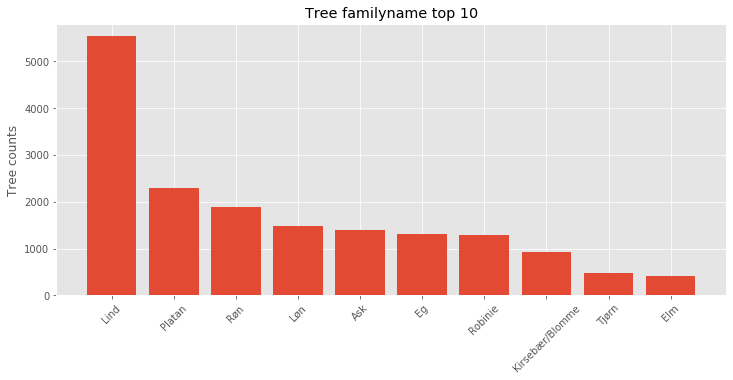

In [115]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index[:10],traer.values[:10])
plt.title("Tree familyname top 10")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

In [116]:
fig = go.Figure([go.Bar(x=traer.index[:10], y=traer.values[:10],
                 text=traer.values[:10],textposition="auto")])
fig.show()

In [117]:
byer = df1.groupby(['bydelsnavn']).count().id
byer = byer.sort_values(ascending=False)

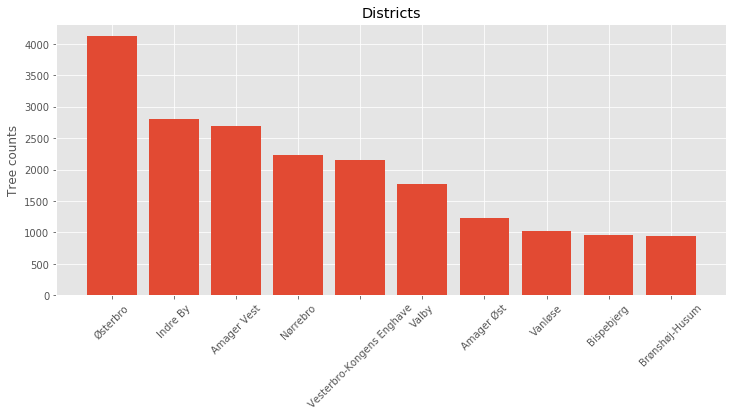

In [118]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(byer.index,byer.values)
plt.title("Districts")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

Let's make a plot of the top 10 most common trees in each district of Copenhagen

In [119]:
len(districts)


10

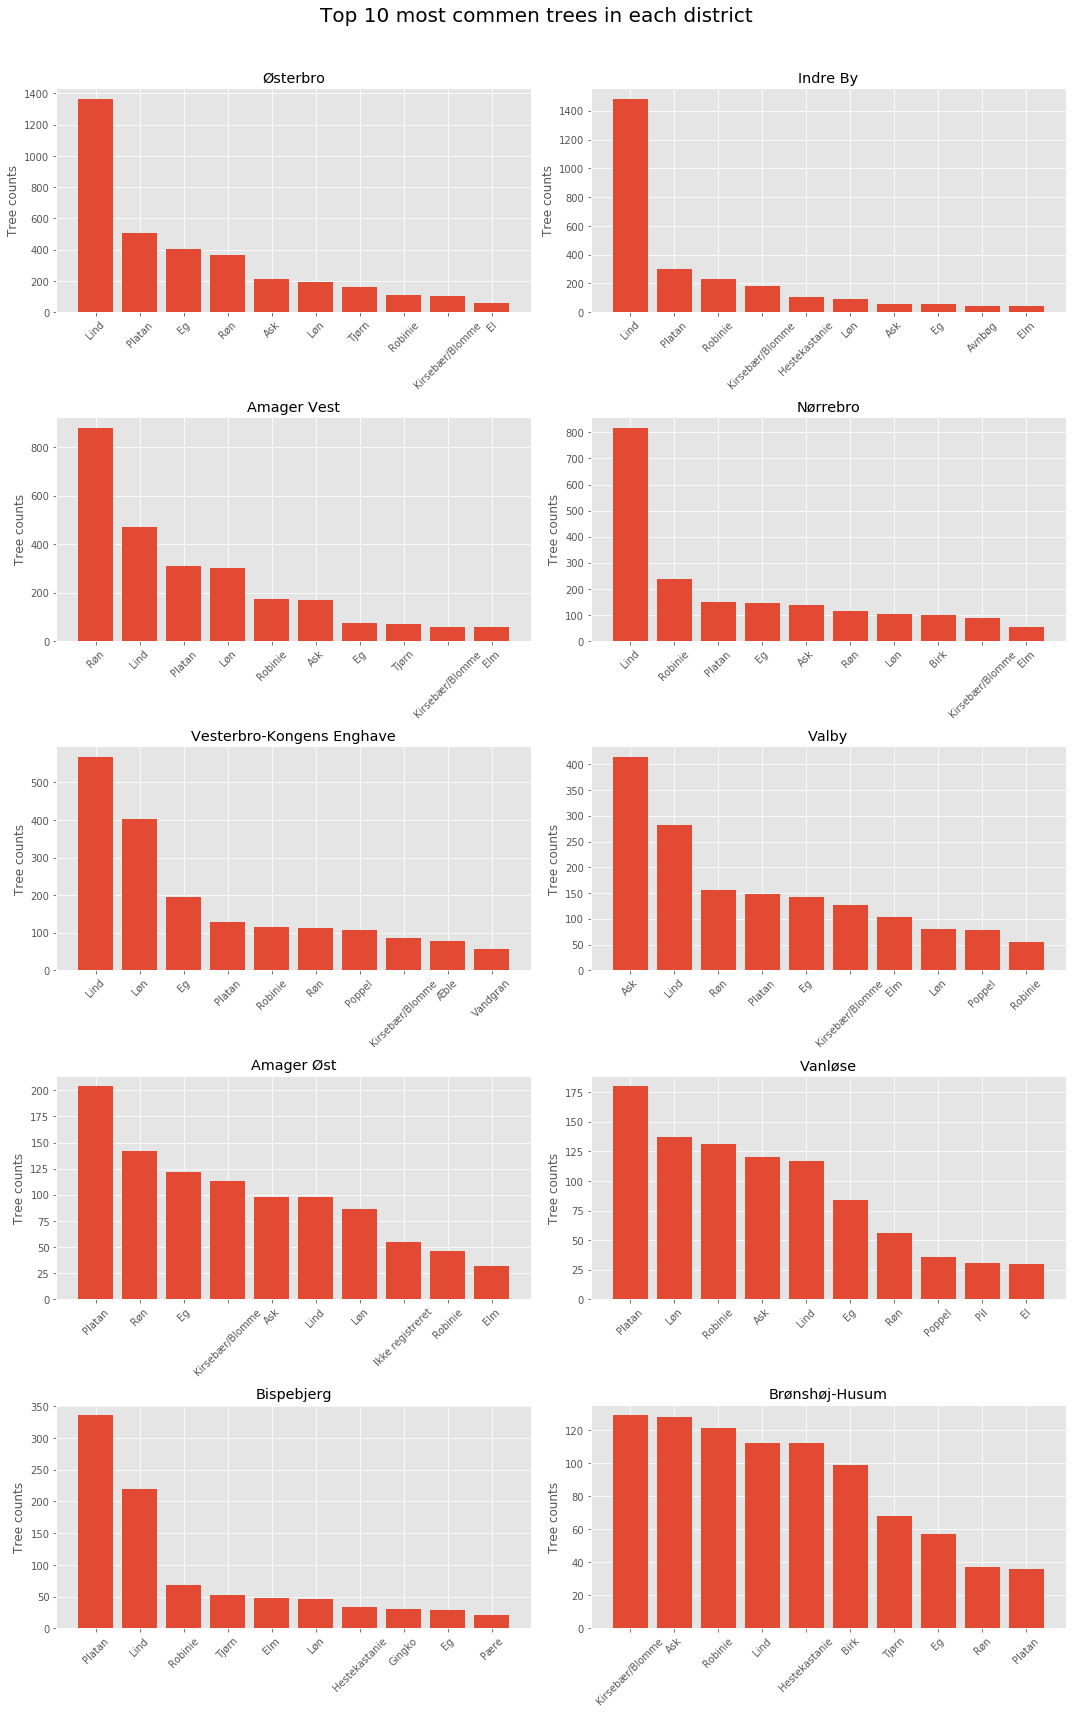

In [120]:
# Define district names
districts = byer.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 25)
# Initialize the figure
fig, axs = plt.subplots(5,2)
p=0

for i in range(0,5):
    for j in range(0,2):
        # slice dataframe to only the districs
        temp = df1[df1['bydelsnavn'] == districts[p]]
        treeTemp = temp.groupby(['slaegtsnavn']).count().id
        treeTemp = treeTemp.sort_values(ascending=False) 
        # Plot
        axs[i,j].bar(treeTemp.index[:10],treeTemp.values[:10])
        axs[i,j].set_title(districts[p])
        axs[i,j].set_ylabel("Tree counts")
        axs[i,j].set_xticklabels(treeTemp.index[:10],rotation=45)
        p += 1

plt.suptitle("Top 10 most commen trees in each district", size = 20)
# Tight fit
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

Lets now make a stacked barchart

In [121]:
temp = df1.groupby(['slaegtsnavn','bydelsnavn']).count()['FID']
temp = temp.unstack()
temp = temp.fillna(0)
temp.head()

bydelsnavn                 Amager Vest  Amager Øst  Bispebjerg  \
slaegtsnavn                                                      
Albizia (Ærteblomst-fam,)          0.0         0.0         0.0   
Ambratræ                           0.0         0.0         0.0   
Ask                              169.0        98.0         9.0   
Avnbøg                             5.0        11.0         3.0   
Birk                               6.0        20.0        14.0   

bydelsnavn                 Brønshøj-Husum  Indre By  Nørrebro  Valby  Vanløse  \
slaegtsnavn                                                                     
Albizia (Ærteblomst-fam,)             0.0       0.0       0.0    0.0      0.0   
Ambratræ                              0.0       0.0       2.0    2.0      0.0   
Ask                                 128.0      59.0     139.0  414.0    120.0   
Avnbøg                                0.0      43.0      50.0   33.0      7.0   
Birk                                 99.0       1.0      99.0    6.0      6.0   

bydelsnavn                 Vesterbro-Kongens Enghave  Østerbro  
slaegtsnavn                                                     
Albizia (Ærteblomst-fam,)                        0.0      10.0  
Ambratræ                                        15.0      27.0  
Ask                                             48.0     210.0  
Avnbøg                                          17.0      24.0  
Birk                                            16.0       8.0

## OBS farverne skal lige tilpasses, slet ikke nok her.

In [122]:
x = temp.columns
trees = temp.index

for i in range(0,len(trees)):
    if i == 0:
        fig = go.Figure(go.Bar(x=x, y=temp.iloc[i,:].values, name = trees[i]))
    else:
        fig.add_trace(go.Bar(x=x, y=temp.iloc[i,:].values, name = trees[i]))

fig.update_layout(barmode='stack')
fig.show()

# Analyse af df2, *trae_basis.csv*

In [123]:
# So all columns can be viewed

pd.set_option('display.max_columns', None)

In [124]:
df2 = pd.read_csv("trae_basis.csv")
df2.head()

FID kategori saerligt_trae     id     type        element  \
0  trae_basis.1  gadetræ           nej  18611  2 Træer  2.3 Parktræer   
1  trae_basis.2  gadetræ           nej  21291  2 Træer  2.3 Parktræer   
2  trae_basis.3  gadetræ           nej  21292  2 Træer  2.3 Parktræer   
3  trae_basis.4  gadetræ           nej  21293  2 Træer  2.3 Parktræer   
4  trae_basis.5  gadetræ           nej  21294  2 Træer  2.3 Parktræer   

  under_element ny_dm_element ny_dm_under_element  arbsted_tekst_id  \
0           NaN     Gadetræer             Gadetræ  Gadet_Gadet_3421   
1           NaN     Gadetræer             Gadetræ  Gadet_Gadet_3421   
2           NaN     Gadetræer             Gadetræ  Gadet_Gadet_3421   
3           NaN     Gadetræer             Gadetræ  Gadet_Gadet_3421   
4           NaN     Gadetræer             Gadetræ  Gadet_Gadet_3421   

                   driftsplan_navn enhedsomraade              traeart  \
0  Gadetræer Vesterbro-Kgs Enghave         Valby  Tilia platyphyllos    
1  Gadetræer Vesterbro-Kgs Enghave         Valby  Tilia platyphyllos    
2  Gadetræer Vesterbro-Kgs Enghave         Valby  Tilia platyphyllos    
3  Gadetræer Vesterbro-Kgs Enghave         Valby  Tilia platyphyllos    
4  Gadetræer Vesterbro-Kgs Enghave         Valby  Tilia platyphyllos    

        dansk_navn slaegtsnavn  planteaar   plantet_halvaar     faeldningsaar  \
0  Storbladet lind        Lind     1953.0  Ikke registreret  Ikke registreret   
1  Storbladet lind        Lind     1953.0  Ikke registreret  Ikke registreret   
2  Storbladet lind        Lind     1953.0  Ikke registreret  Ikke registreret   
3  Storbladet lind        Lind     1953.0  Ikke registreret  Ikke registreret   
4  Storbladet lind        Lind     1953.0  Ikke registreret  Ikke registreret   

                  bydelsnavn               omraade      vejnavn     vejklasse  \
0  Vesterbro-Kongens Enghave  Center Drift Syd CDS  Scandiagade  regional vej   
1  Vesterbro-Kongens Enghave  Center Drift Syd CDS  Scandiagade  regional vej   
2  Vesterbro-Kongens Enghave  Center Drift Syd CDS  Scandiagade  regional vej   
3  Vesterbro-Kongens Enghave  Center Drift Syd CDS  Scandiagade  regional vej   
4  Vesterbro-Kongens Enghave  Center Drift Syd CDS  Scandiagade  regional vej   

    vejstatus fritrumsprofil stammeomfang     kronediameter    placering  \
0  Kommunevej          4,5 m      30 - 40  Ikke registreret  Midterrabat   
1  Kommunevej          4,5 m      30 - 40  Ikke registreret  Midterrabat   
2  Kommunevej          4,5 m      30 - 40  Ikke registreret  Midterrabat   
3  Kommunevej          4,5 m      30 - 40  Ikke registreret  Midterrabat   
4  Kommunevej          4,5 m      30 - 40  Ikke registreret  Midterrabat   

  afgraensning plantemetode omgivelse vaekstmedie       beskyttelse sundhed  \
0     Med kant         Muld      Græs     > 15 m2  Ikke registreret     God   
1     Med kant         Muld      Græs     > 15 m2  Ikke registreret     God   
2     Med kant         Muld      Græs     > 15 m2  Ikke registreret     God   
3     Med kant         Muld      Græs     > 15 m2  Ikke registreret     God   
4     Med kant         Muld      Græs     > 15 m2  Ikke registreret     God   

      skudtilvaekst andre_vaekstforhold   bevaringsvaerdi  \
0  Ikke registreret                 NaN  Ikke registreret   
1  Ikke registreret                 NaN  Ikke registreret   
2  Ikke registreret                 NaN  Ikke registreret   
3  Ikke registreret                 NaN  Ikke registreret   
4  Ikke registreret                 NaN  Ikke registreret   

                     registrering_type driftstatus_gadetrae ejer  \
0  Gadetræ registreret før sommer 2009     Ikke registreret  TMF   
1  Gadetræ registreret før sommer 2009     Ikke registreret  TMF   
2  Gadetræ registreret før sommer 2009     Ikke registreret  TMF   
3  Gadetræ registreret før sommer 2009     Ikke registreret  TMF   
4  Gadetræ registreret før sommer 2009     Ikke registreret  TMF   

  driftsorganisation gara

In [125]:
df2.shape

(59580, 183)

In [126]:
traer = df2.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)

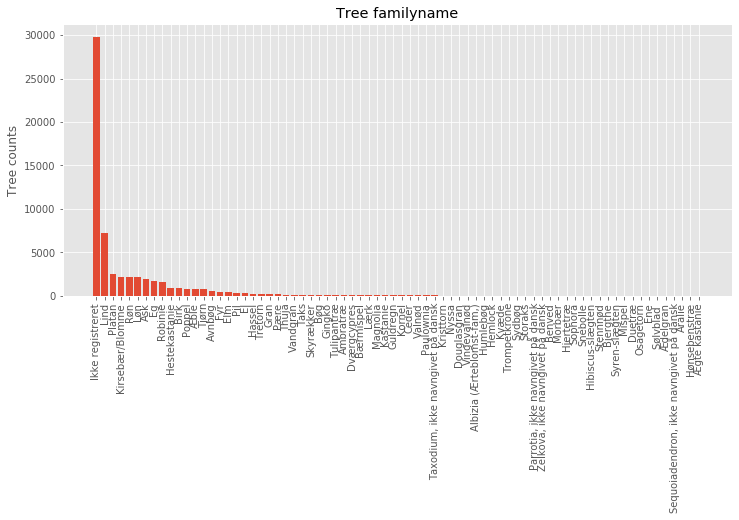

In [127]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()

We can see that there is a lot of trees, looks like if we remove these trees the two datasets might be the same?

In [128]:
df2[df2['slaegtsnavn'] != 'Ikke registreret'].shape

(29774, 183)

This does not appear to be the case, there are still allmost 10.000 more observations in this dataset, so lets remove the none registred trees and start the fun.

In [129]:
df2 = df2[df2['slaegtsnavn'] != 'Ikke registreret']

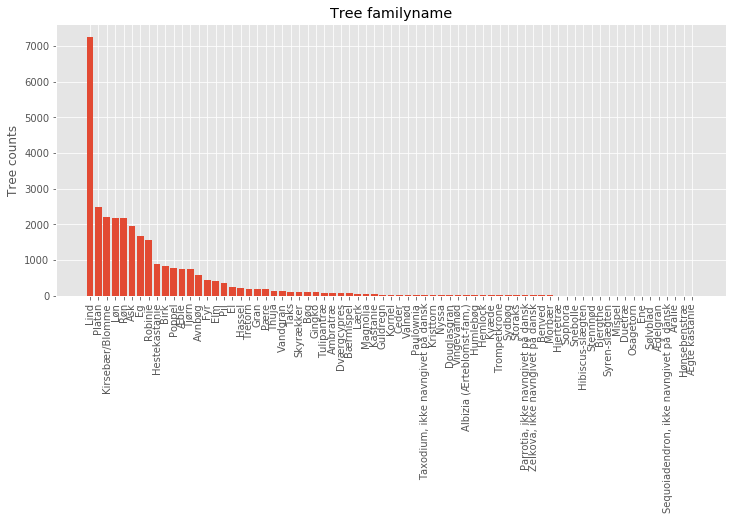

Different tree families: 73


In [130]:
traer = df2.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()
print("Different tree families:", len(traer))

Lets go for that top-10 view again in plotly

In [131]:
fig = go.Figure([go.Bar(x=traer.index[:10], y=traer.values[:10],
                 text=traer.values[:10],textposition="auto")])
fig.show()

And let's see how it is distributed between the districts

In [132]:
byer = df1.groupby(['bydelsnavn']).count().id
byer = byer.sort_values(ascending=False)

In [133]:
fig = go.Figure([go.Bar(x=byer.index, y=byer.values,
                 text=byer.values,textposition="auto")])
fig.update_layout(title = "Tree counts for each district",
                 yaxis_title = "Tree counts")
fig.show()

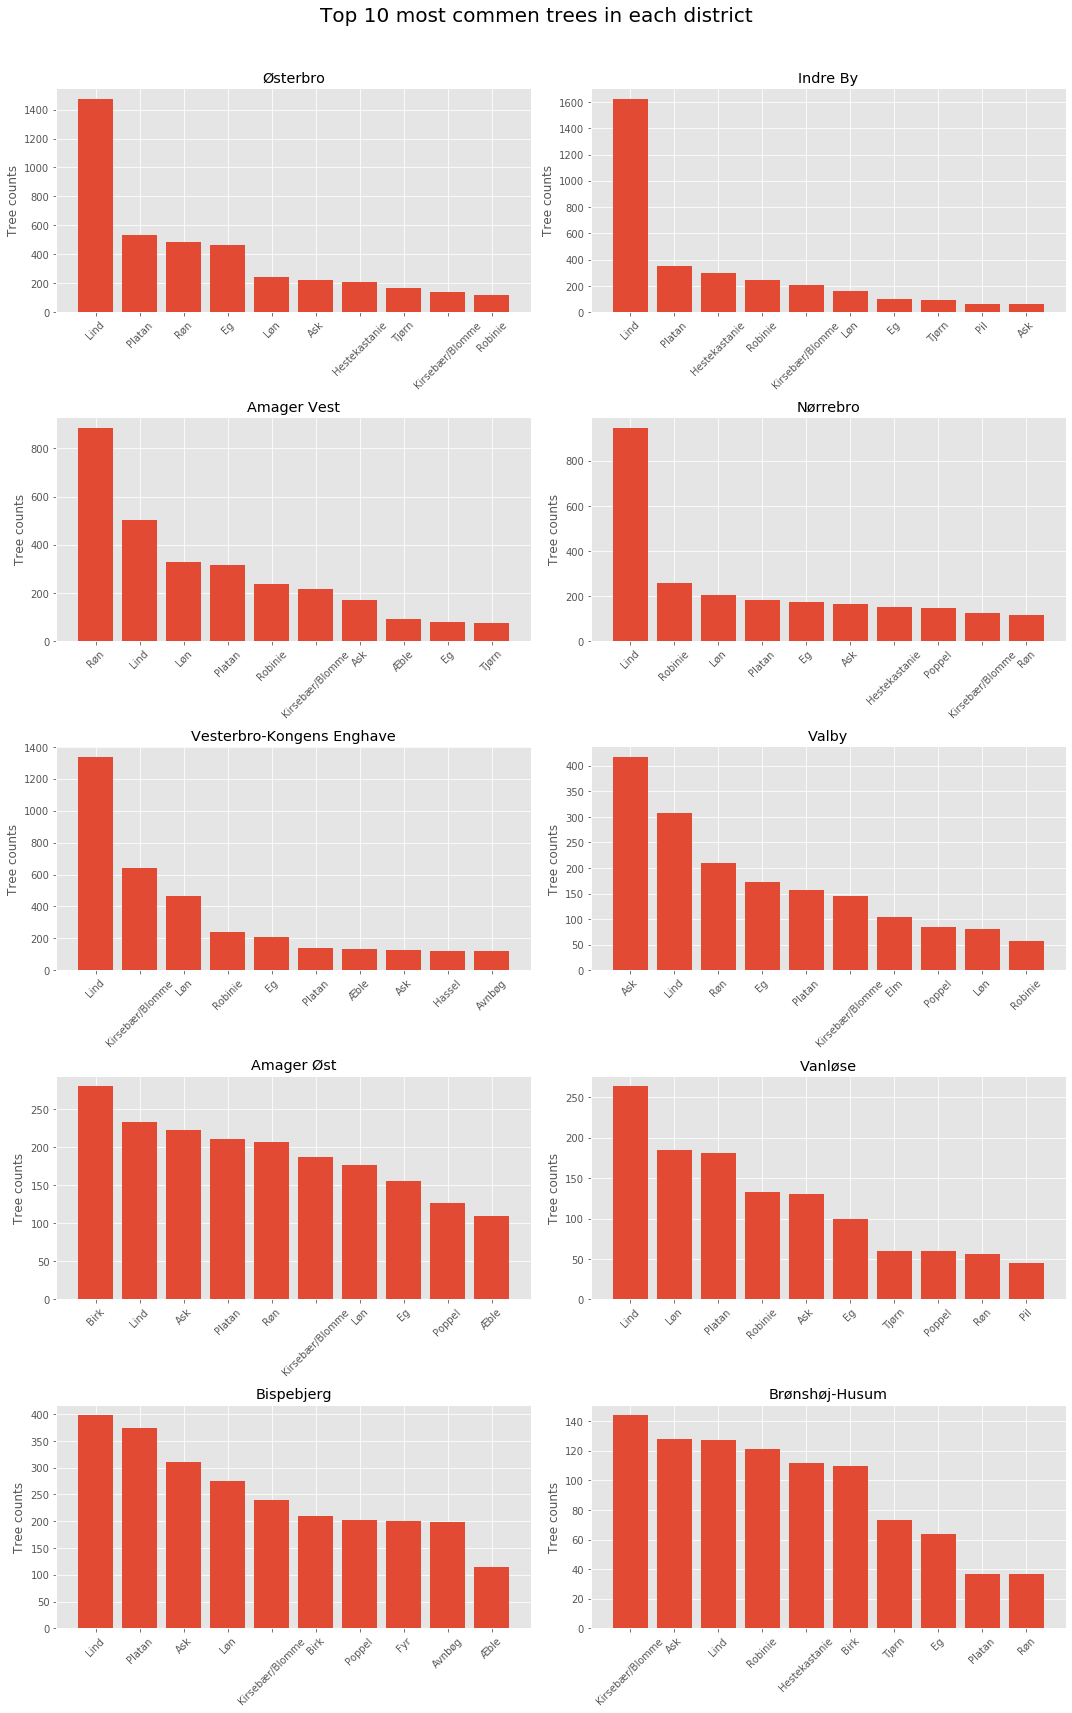

In [134]:
# Define district names
districts = byer.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 25)
# Initialize the figure
fig, axs = plt.subplots(5,2)
p=0

for i in range(0,5):
    for j in range(0,2):
        # slice dataframe to only the districs
        temp = df2[df2['bydelsnavn'] == districts[p]]
        treeTemp = temp.groupby(['slaegtsnavn']).count().id
        treeTemp = treeTemp.sort_values(ascending=False) 
        # Plot
        axs[i,j].bar(treeTemp.index[:10],treeTemp.values[:10])
        axs[i,j].set_title(districts[p])
        axs[i,j].set_ylabel("Tree counts")
        axs[i,j].set_xticklabels(treeTemp.index[:10],rotation=45)
        p += 1

plt.suptitle("Top 10 most commen trees in each district", size = 20)
# Tight fit
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

In [150]:
df1['X']=df1['wkb_geometry'].str[7:15]
df1['Y']=df1['wkb_geometry'].str[25:-1]
df2['X']=df2['wkb_geometry'].str[7:15]
df2['Y']=df2['wkb_geometry'].str[25:-1]

In [161]:
df1.sort_values('Y',ascending=True)

FID     id                          traeart        slaegt  \
13385  gadetraer.13379  22511               Sorbus intermedia     Sorbus sp.   
13384  gadetraer.13378  22510               Sorbus intermedia     Sorbus sp.   
13410  gadetraer.13404  22536               Sorbus intermedia     Sorbus sp.   
13395  gadetraer.13389  22521               Sorbus intermedia     Sorbus sp.   
13412  gadetraer.13406  22538               Sorbus intermedia     Sorbus sp.   
13418  gadetraer.13412  22544               Sorbus intermedia     Sorbus sp.   
13419  gadetraer.13413  22545               Sorbus intermedia     Sorbus sp.   
13420  gadetraer.13414  22546               Sorbus intermedia     Sorbus sp.   
13413  gadetraer.13407  22539               Sorbus intermedia     Sorbus sp.   
13415  gadetraer.13409  22541               Sorbus intermedia     Sorbus sp.   
13409  gadetraer.13403  22535               Sorbus intermedia     Sorbus sp.   
13408  gadetraer.13402  22534               Sorbus intermedia     Sorbus sp.   
13407  gadetraer.13401  22533               Sorbus intermedia     Sorbus sp.   
13411  gadetraer.13405  22537               Sorbus intermedia     Sorbus sp.   
13404  gadetraer.13398  22530               Sorbus intermedia     Sorbus sp.   
13396  gadetraer.13390  22522               Sorbus intermedia     Sorbus sp.   
13400  gadetraer.13394  22526               Sorbus intermedia     Sorbus sp.   
13399  gadetraer.13393  22525               Sorbus intermedia     Sorbus sp.   
13398  gadetraer.13392  22524               Sorbus intermedia     Sorbus sp.   
13392  gadetraer.13386  22518               Sorbus intermedia     Sorbus sp.   
13397  gadetraer.13391  22523               Sorbus intermedia     Sorbus sp.   
13401  gadetraer.13395  22527               Sorbus intermedia     Sorbus sp.   
13394  gadetraer.13388  22520               Sorbus intermedia     Sorbus sp.   
13390  gadetraer.13384  22516               Sorbus intermedia     Sorbus sp.   
18152  gadetraer.18153  84222       Platanus hybr. acerifolia   Platanus sp.   
18151  gadetraer.18152  84221       Platanus hybr. acerifolia   Platanus sp.   
18150  gadetraer.18151  84220       Platanus hybr. acerifolia   Platanus sp.   
13391  gadetraer.13385  22517               Sorbus intermedia     Sorbus sp.   
13386  gadetraer.13380  22512               Sorbus intermedia     Sorbus sp.   
13393  gadetraer.13387  22519               Sorbus intermedia     Sorbus sp.   
...                ...    ...                              ...           ...   
6602    gadetraer.6585  12026  Tilia hybr. europaea 'Pallida'      Tilia sp.   
9486    gadetraer.9466  12478                   Tilia europaea     Tilia sp.   
9143    gadetraer.9124  12015       Platanus hybr. acerifolia   Platanus sp.   
9480    gadetraer.9460  12469                   Tilia europaea     Tilia sp.   
9137    gadetraer.9118  12009                        Ulmus sp.     Ulmus sp.   
9279    gadetraer.9260  12157                   Tilia europaea     Tilia sp.   
9479    gadetraer.9459  12468                   Tilia europaea     Tilia sp.   
16039  gadetraer.16037  59294  Tilia hybr. europaea 'Pallida'      Tilia sp.   
7224    gadetraer.7210  10384       Platanus hybr. acerifolia   Platanus sp.   
9275    gadetraer.9256  12153                   Tilia europaea     Tilia sp.   
9365    gadetraer.9345  12258                   Tilia europaea     Tilia sp.   
9281    gadetraer.9262  12159                   Tilia europaea     Tilia sp.   
9345    gadetraer.9326  12231                   Tilia europaea     Tilia sp.   
8063    gadetraer.8047  11645  Tilia hybr. europaea 'Pallida'      Tilia sp.   
9291    gadetraer.9272  12170                   Tilia europaea     Tilia sp.   
18490  gadetraer.18491  85343           Malus hybr. 'Gorgeous'     Malus sp.   
9288    gadetraer.9269  12166                   Tilia europaea     Tilia sp.   
9289    gadetraer.9270  12167                   Tilia europaea     Tilia sp.   
9314    gadetraer.9

In [164]:
heat_trees = df1[['Y', 'X']]


# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_trees.iterrows()]

# Plot it on the map
map_hooray = folium.Map([55.687784, 12.541356],tiles="Stamen Watercolor" ,zoom_start = 12)
HeatMap(heat_data, radius=12, max_zoom=18).add_to(map_hooray)
folium.TileLayer('Stamen Terrain').add_to(map_hooray)
# Display the map
map_hooray

In [163]:
heat_trees = df2[['Y', 'X']]


# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_trees.iterrows()]

# Plot it on the map
map_hooray = folium.Map([55.687784, 12.541356],tiles="Stamen Watercolor" ,zoom_start = 12)
HeatMap(heat_data, radius=12, max_zoom=18).add_to(map_hooray)
folium.TileLayer('openstreetmap').add_to(map_hooray)
# Display the map
map_hooray

In [166]:
df3 = pd.read_csv("trae_basis.csv")
df3 = df3[df3['slaegtsnavn'] == 'Ikke registreret']


In [167]:
df3['X']=df3['wkb_geometry'].str[7:15]
df3['Y']=df3['wkb_geometry'].str[25:-1]

In [168]:
heat_trees = df3[['Y', 'X']]


# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_trees.iterrows()]

# Plot it on the map
map_hooray = folium.Map([55.687784, 12.541356],tiles="Stamen Watercolor" ,zoom_start = 12)
HeatMap(heat_data, radius=12, max_zoom=18).add_to(map_hooray)
folium.TileLayer('openstreetmap').add_to(map_hooray)
# Display the map
map_hooray